In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\sdziike\\Downloads\\EDA\\netflix_titles_2021.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data.shape

(8807, 12)

In [7]:
data[(data["director"].isnull() & data["title"]=="Blood & Water")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
data[data["title"]=="Blood & Water"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [9]:
missing_director_counts = data[data['director'].isnull()]['title'].value_counts()
print(missing_director_counts)


title
Blood & Water                  1
Seven Seconds                  1
The Frankenstein Chronicles    1
Dragons: Race to the Edge      1
Everything Sucks!              1
                              ..
Legacies                       1
Community                      1
How to Fix a Drug Scandal      1
Man Like Mobeen                1
Zombie Dumb                    1
Name: count, Length: 2634, dtype: int64


In [10]:
missing_director_counts = data[data['director'].isnull()]['title'].value_counts().sort_values(ascending=False)
print(missing_director_counts)


title
Blood & Water              1
Tobot Galaxy Detectives    1
Numberblocks               1
Nailed It                  1
Love on the Spectrum       1
                          ..
Yoko and His Friends       1
YOM                        1
Yu-Gi-Oh! Arc-V            1
Yunus Emre                 1
Zombie Dumb                1
Name: count, Length: 2634, dtype: int64


In [11]:
data1 = data.dropna(subset=["date_added", "rating", "duration"])

In [12]:
data1.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
data[(data["cast"].isnull() & data["country"].isnull())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN,NaN,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8109,s8110,TV Show,Strongland,NaN,NaN,NaN,"January 18, 2019",2018,TV-PG,1 Season,"Docuseries, International TV Shows",From Spain's countryside to Scotland's stony t...
8199,s8200,TV Show,The Bachelor,NaN,NaN,NaN,"December 1, 2019",2009,TV-14,1 Season,"Reality TV, Romantic TV Shows",A single man searches for his soulmate through...
8450,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,NaN,NaN,"September 1, 2018",2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo...","French soccer fans, celebrities and athletes r..."
8609,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...


In [14]:
values = {"director":"missing"}
data1 = data1.fillna(value=values)

In [15]:
data1.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         829
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
data2 = data1.dropna(subset=["cast", "country"])
data2.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [19]:
# Convert "release_year" column to int
data2['release_year'] = data2['release_year'].astype(int)

# Display the updated DataFrame
print(data2.dtypes)
print(data2)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int32
rating          object
duration        object
listed_in       object
description     object
dtype: object
     show_id     type                          title         director  \
1         s2  TV Show                  Blood & Water          missing   
4         s5  TV Show                   Kota Factory          missing   
7         s8    Movie                        Sankofa     Haile Gerima   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
9        s10    Movie                   The Starling   Theodore Melfi   
...      ...      ...                            ...              ...   
8801   s8802    Movie                        Zinzana  Majid Al Ansari   
8802   s8803    Movie                         Zodiac    David Fincher   
8804   s8805    Movie                     Zombieland 

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\4018125043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['release_year'] = data2['release_year'].astype(int)


In [20]:
data2["date_added"].nunique()

1673

In [21]:
data[data["date_added"]==" August 4, 2017"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6457,s6458,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim​, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Reali...",The best chefs of Korea go head-to-head to cre...
7705,s7706,TV Show,Paranormal Survivor,NaN,NaN,Canada,"August 4, 2017",2016,TV-14,2 Seasons,Docuseries,"In interviews and reenactments, ordinary peopl..."


In [22]:
#remove leading or trailing space in column "date_added"
data2["date_added"] = data2["date_added"].str.strip()
data2[data2["date_added"]==" August 4, 2017"]

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\1064215797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["date_added"] = data2["date_added"].str.strip()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [23]:
# Convert "date_added" to datetime format
data2['date_added'] = pd.to_datetime(data2['date_added'], format='%B %d, %Y')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7290 entries, 1 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7290 non-null   object        
 1   type          7290 non-null   object        
 2   title         7290 non-null   object        
 3   director      7290 non-null   object        
 4   cast          7290 non-null   object        
 5   country       7290 non-null   object        
 6   date_added    7290 non-null   datetime64[ns]
 7   release_year  7290 non-null   int32         
 8   rating        7290 non-null   object        
 9   duration      7290 non-null   object        
 10  listed_in     7290 non-null   object        
 11  description   7290 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 711.9+ KB


C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\3067472571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['date_added'] = pd.to_datetime(data2['date_added'], format='%B %d, %Y')


In [24]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [25]:
data2["type"].nunique()

2

In [26]:
data2["type"] = data2["type"].astype("category")

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\665669595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["type"] = data2["type"].astype("category")


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7290 entries, 1 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7290 non-null   object        
 1   type          7290 non-null   category      
 2   title         7290 non-null   object        
 3   director      7290 non-null   object        
 4   cast          7290 non-null   object        
 5   country       7290 non-null   object        
 6   date_added    7290 non-null   datetime64[ns]
 7   release_year  7290 non-null   int32         
 8   rating        7290 non-null   object        
 9   duration      7290 non-null   object        
 10  listed_in     7290 non-null   object        
 11  description   7290 non-null   object        
dtypes: category(1), datetime64[ns](1), int32(1), object(9)
memory usage: 662.2+ KB


In [28]:
data2["country"].unique()

array(['South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'United States', 'Germany, Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'United States, India, France',
       'Finland', 'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'Belgium', 'United Kingdom, United States',
       'United States, United Kingdom', 'France, United States',
       'South Korea', 'Spain', 'United States, Singapore',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 

In [29]:
data2["country"].nunique()

689

In [30]:
def standardize_country_names(df, column):
    df[column] = df[column].apply(lambda x: ', '.join(sorted(x.split(', '))))
    return df

data2 = standardize_country_names(data2, 'country')

# Display unique values after standardization
print(data2['country'].nunique())


565


C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\585659058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: ', '.join(sorted(x.split(', '))))


In [31]:
data2.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Burkina Faso, Ethiopia, Germany, Ghana, United...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Czech Republic, Germany",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
15,s16,TV Show,Dear White People,missing,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
17,s18,TV Show,Falsa identidad,missing,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,s22,TV Show,Resurrection: Ertugrul,missing,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [32]:
# Check for duplicate rows
print(data2.duplicated().sum())

0


In [33]:
data2[data2['type']=="Movie"].count()

show_id         5277
type            5277
title           5277
director        5277
cast            5277
country         5277
date_added      5277
release_year    5277
rating          5277
duration        5277
listed_in       5277
description     5277
dtype: int64

In [34]:
data2['title'] = data2['title'].str.strip()

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\447844792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['title'] = data2['title'].str.strip()


In [35]:
# Count occurrences of "Seasons" in the "duration" column
season_count = data2['duration'].str.contains('Seasons', na=False).sum()

print(season_count)


761


# Drop rows where 'duration' contains 'Seasons'
data2 = data2[~data2['duration'].str.contains('Seasons', na=False)]

# Reset index after dropping rows
data2.reset_index(drop=True, inplace=True)


In [37]:
season_count = data2['duration'].str.contains('Seasons', na=False).sum()

print(season_count)


761


In [38]:
season_count2 = data2['duration'].str.contains('Season', na=False).sum()

print(season_count2)


2013


# Drop rows where 'duration' contains 'Seasons'
data2 = data2[~data2['duration'].str.contains('Season', na=False)]

# Reset index after dropping rows
data2.reset_index(drop=True, inplace=True)

In [40]:
data2.tail(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8736,s8737,TV Show,Who's the One,missing,"Tien Hsin, Weber Yang, Pink Yang, Johnny Lu, A...",Taiwan,2017-01-01,2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A doctor performs plastic surgery on a fat man...
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,2019-02-01,2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...
8740,s8741,TV Show,Wild Alaska,missing,Dougray Scott,United Kingdom,2017-03-31,2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,missing,Alexander Siddig,United Kingdom,2017-03-31,2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,2020-01-01,1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch..."
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,2020-09-01,2018,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","East Germany, United States, West Germany",2020-01-01,1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...
8747,s8748,TV Show,Winsanity,missing,Donald Faison,United States,2018-12-15,2016,TV-G,1 Season,Reality TV,Actor Donald Faison hosts this game show in wh...
8748,s8749,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,2016-11-01,1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p..."
8749,s8750,TV Show,Winter Sun,missing,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Turkey,2017-08-01,2014,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Years after ruthless businessmen kill his fath...


In [41]:
data2["duration"] = data2["duration"].str.replace("min", "")

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\1095443916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["duration"] = data2["duration"].str.replace("min", "")


In [42]:
data2["duration"] = data2["duration"].astype('int32')

ValueError: invalid literal for int() with base 10: '2 Seasons'

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7290 entries, 1 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7290 non-null   object        
 1   type          7290 non-null   category      
 2   title         7290 non-null   object        
 3   director      7290 non-null   object        
 4   cast          7290 non-null   object        
 5   country       7290 non-null   object        
 6   date_added    7290 non-null   datetime64[ns]
 7   release_year  7290 non-null   int32         
 8   rating        7290 non-null   object        
 9   duration      7290 non-null   object        
 10  listed_in     7290 non-null   object        
 11  description   7290 non-null   object        
dtypes: category(1), datetime64[ns](1), int32(1), object(9)
memory usage: 662.2+ KB


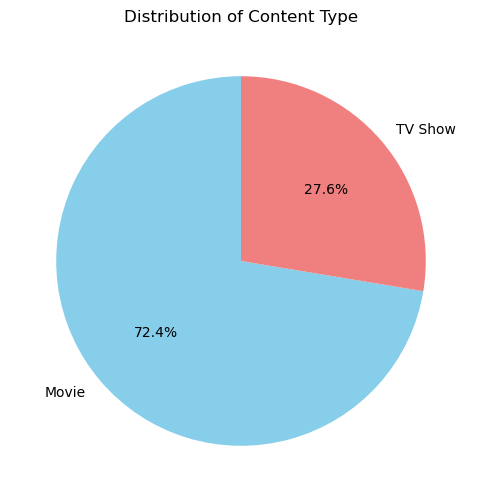

In [44]:
# Count the occurrences of each unique value in 'type'
type_counts = data2['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
type_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

# Add title
plt.title('Distribution of Content Type')

# Show the chart
plt.ylabel('')  # Hide y-label
plt.show()

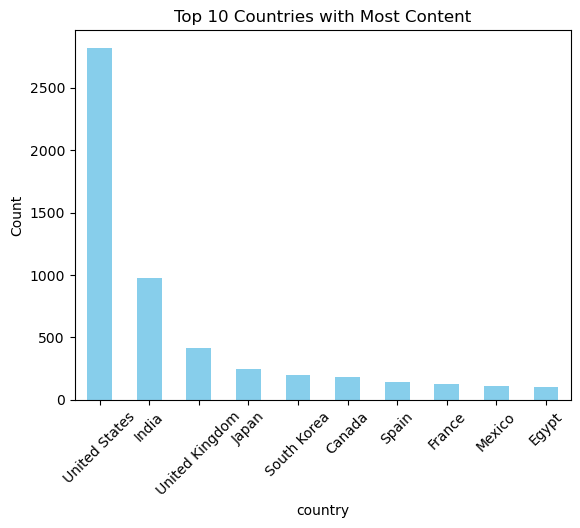

In [45]:
# Top 10 Countries with the most content
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Content")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

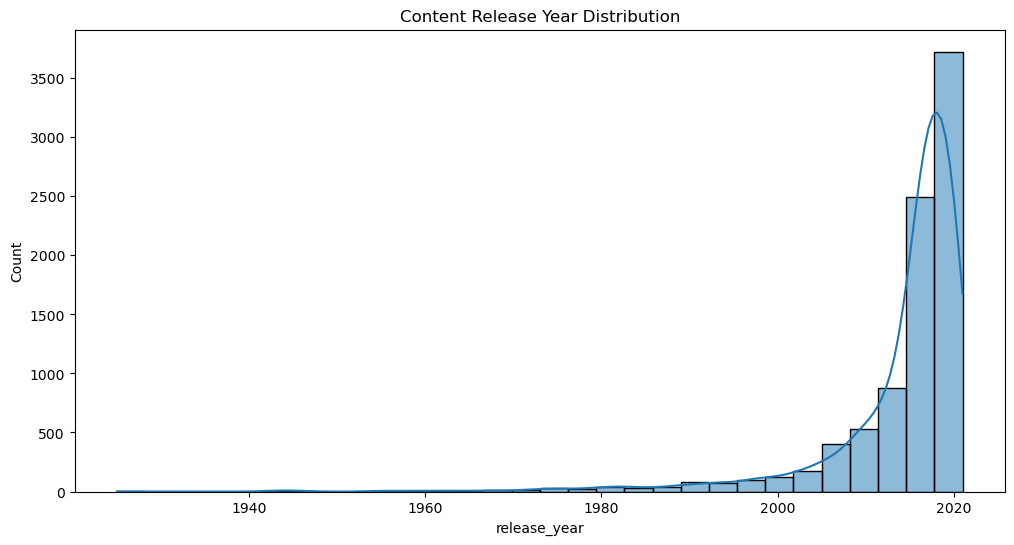

In [67]:
# Count of movies/TV shows per release year
plt.figure(figsize=(12,6))
sns.histplot(data['release_year'], bins=30, kde=True)
plt.title("Content Release Year Distribution")
plt.show()

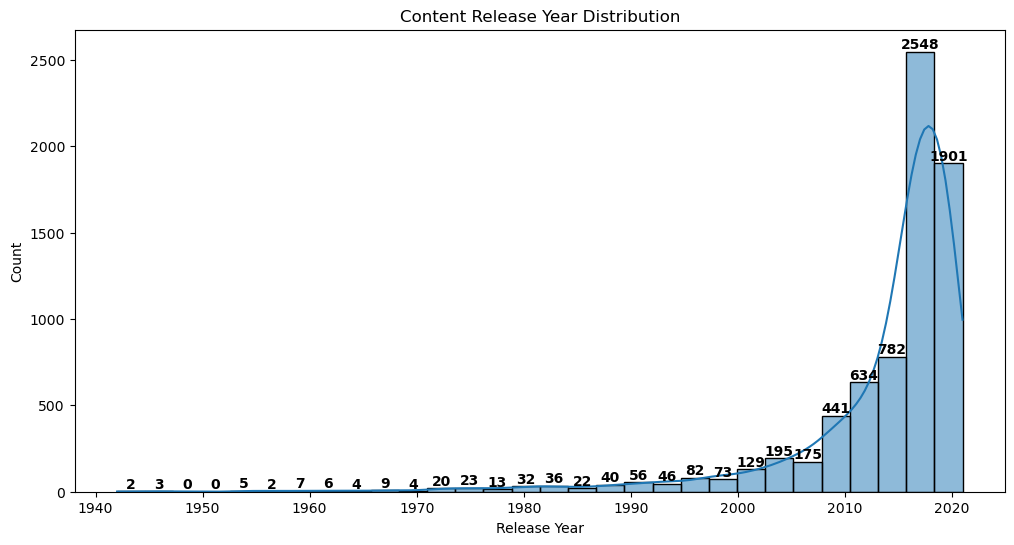

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,6))

# Create histogram
ax = sns.histplot(data2['release_year'], bins=30, kde=True)

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Set title and labels
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Count")

# Show plot
plt.show()


C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\4273711478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


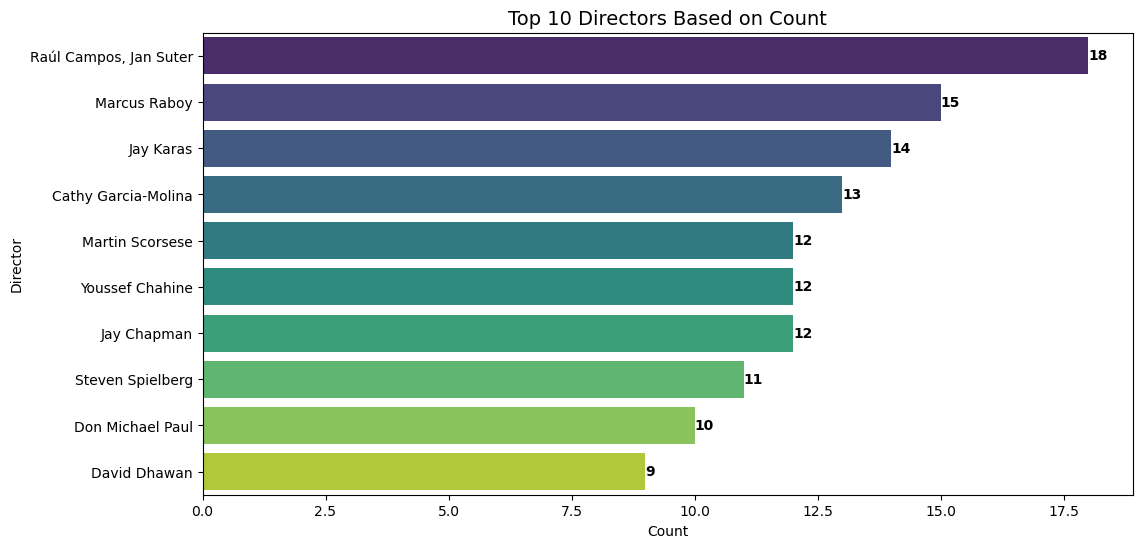

In [71]:
# Exclude rows where 'director' is "missing"
filtered_data = data2[data2['director'].str.lower() != 'missing']

# Count occurrences of each director
top_directors = filtered_data['director'].value_counts().head(10)

# Plot histogram
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")

# Add value labels
for index, value in enumerate(top_directors.values):
    plt.text(value, index, str(value), va='center', fontsize=10, fontweight='bold', color='black')

# Set titles and labels
plt.title("Top 10 Directors Based on Count", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Director")

# Show plot
plt.show()


In [73]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Burkina Faso, Ethiopia, Germany, Ghana, United...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [74]:
data2["rating"].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [75]:
data2.loc[data2['rating'] == 'PG', 'rating'] = 'TV-PG'

In [76]:
data2["rating"].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'TV-Y7', 'TV-PG', 'R', 'TV-Y', 'TV-G',
       'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [77]:
data2.loc[data2['rating'] == 'G', 'rating'] = 'TV-G'

In [78]:
data2["rating"].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'TV-Y7', 'TV-PG', 'R', 'TV-Y', 'TV-G',
       'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [79]:
data2[data2["rating"]=="NR"].count()

show_id         62
type            62
title           62
director        62
cast            62
country         62
date_added      62
release_year    62
rating          62
duration        62
listed_in       62
description     62
dtype: int64

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\1504786854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


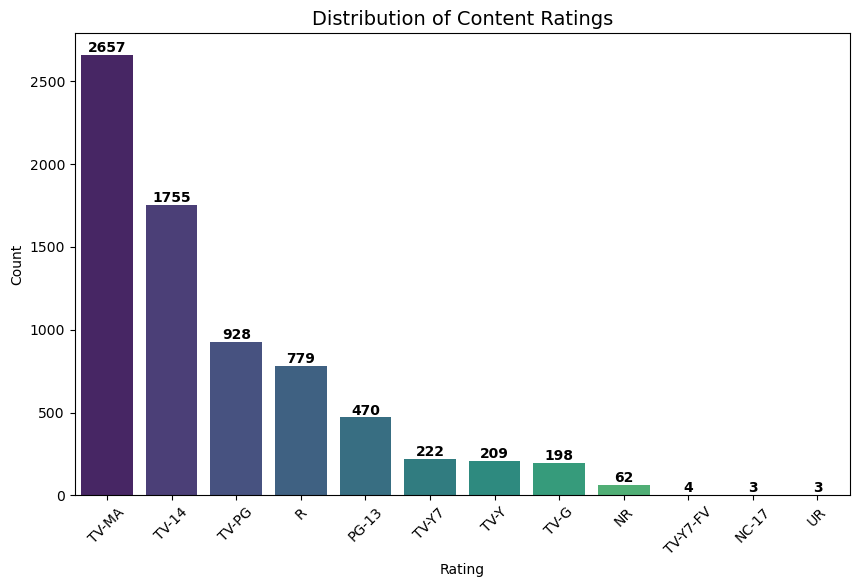

In [80]:
# Ensure 'rating' is treated as a string before counting
rating_counts = data2['rating'].astype(str).value_counts()

# Plot bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Set titles and labels
plt.title("Distribution of Content Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


In [81]:
movies = data2.copy(deep=True)

In [82]:
# Drop all rows where 'type' is 'TV Show'
movies = movies[movies['type'] != 'TV Show']

# Reset index (optional, if you want a clean index)
movies.reset_index(drop=True, inplace=True)


In [83]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Burkina Faso, Ethiopia, Germany, Ghana, United...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Czech Republic, Germany",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
3,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...


In [84]:
movies["duration"] = movies["duration"].astype('int32')

In [85]:
movies["duration"].describe()

count    5277.000000
mean      102.138336
std        26.604120
min         8.000000
25%        89.000000
50%       100.000000
75%       116.000000
max       312.000000
Name: duration, dtype: float64

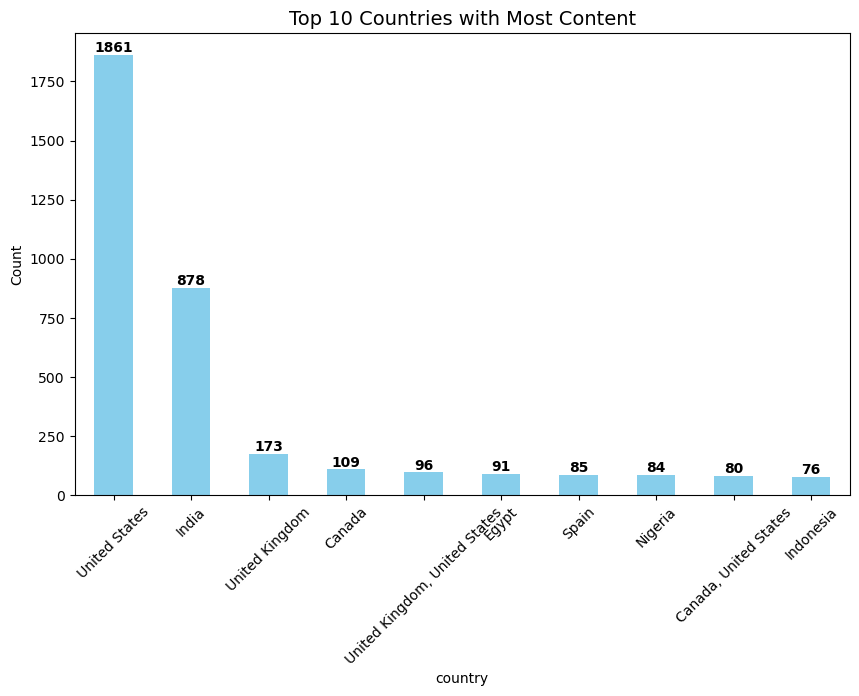

In [86]:
# Get top 10 countries with most content
top_countries = movies['country'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(10,6))
ax = top_countries.plot(kind='bar', color='skyblue')

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Set titles and labels
plt.title("Top 10 Countries with Most Content", fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45)

# Show plot
plt.show()


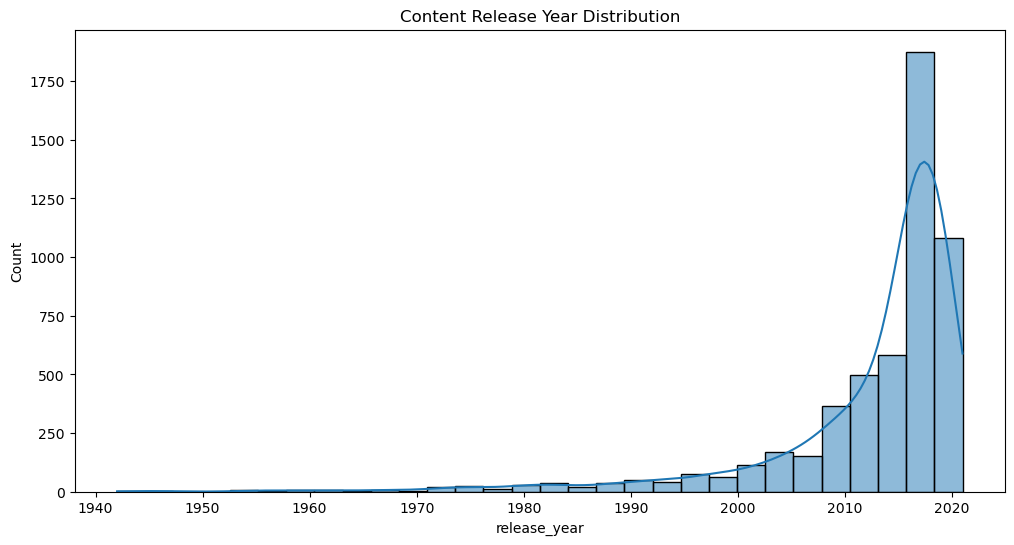

In [87]:
# Count of movies per release year
plt.figure(figsize=(12,6))
sns.histplot(movies['release_year'], bins=30, kde=True)
plt.title("Content Release Year Distribution")
plt.show()

C:\Users\sdziike\AppData\Local\Temp\ipykernel_10464\84237925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


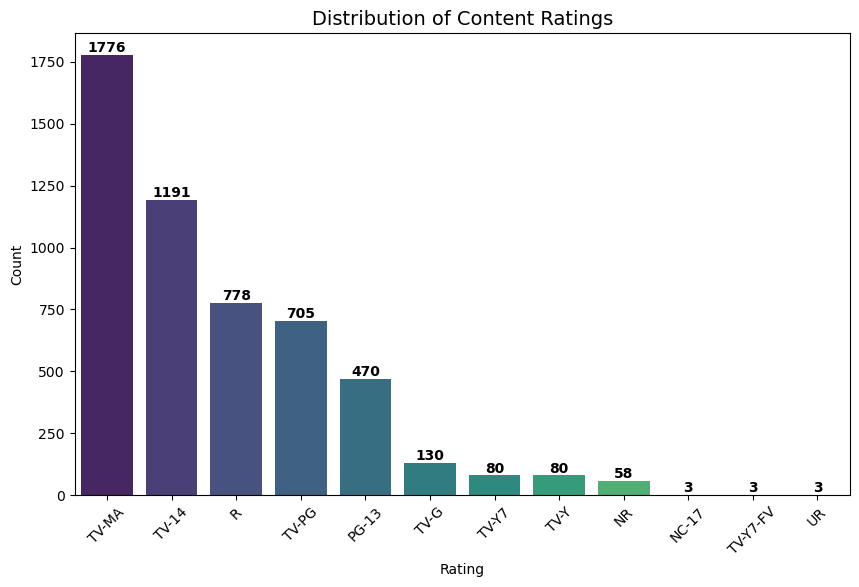

In [88]:
# Ensure 'rating' is treated as a string before counting
rating_counts = movies['rating'].astype(str).value_counts()

# Plot bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Set titles and labels
plt.title("Distribution of Content Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


**Insights**

Movies Dominate the Content – Movies constitute 72.4% of the total content, making them the majority.
TV Shows Are a Minority – TV Shows account for 27.6%, indicating a significantly lower proportion compared to Movies.
Implications – This distribution suggests a platform or dataset that heavily favors Movies over TV Shows. Depending on the context (e.g., a streaming service or content catalog), this might indicate user preference, licensing trends, or strategic content focus.

Top 10 Countries with the Most Content on Netflix, including both TV Shows and Movies:

United States Dominates – The United States has the highest content count, surpassing 2,500 titles, making it the leading contributor to Netflix's library.
India Holds Second Place – India has over 1,000 titles, significantly less than the U.S. but still a major contributor, likely due to Bollywood and regional productions.
Diverse Global Presence – Other countries such as United Kingdom, Japan, South Korea, and Canada follow, showing strong content production in different regions.
Smaller Contributions – The remaining countries (Spain, France, Mexico, Egypt) have fewer titles, but still contribute to the platform’s global content variety.
Possible Reasons – The large number of titles from the U.S. and India could be due to strong entertainment industries, licensing agreements, and demand for English/Hindi content worldwide.

Content Release Year Distribution 
Significant Growth in Content Production

The number of TV shows and movies released has increased significantly since the early 2000s.
There is a sharp rise from around 2010, peaking in the late 2010s and early 2020s.
The highest content release year appears to be just before 2020, with over 2,500 titles.
Early Years Had Minimal Releases

Between the 1940s and the 1990s, the number of releases was very low, with most years having fewer than 100 titles.
This suggests that streaming services and digital platforms have played a major role in increasing content production.
Drop in Content After 2020

There is a decline in the number of releases post-2020, which may be attributed to the impact of the COVID-19 pandemic affecting film and TV production.
Peak Streaming Era

The surge in releases from 2015 to 2019 aligns with the rapid expansion of streaming platforms like Netflix, which aggressively increased original content production during this time.

The data suggests that the last two decades have been transformative for the film and TV industry, particularly due to digital streaming services.
The post-2020 decline highlights potential industry disruptions, but the overall trend indicates a long-term increase in content availability.

Distribution of Content Ratings:
TV-MA is the most common rating

The majority of the content falls under TV-MA (1,776 titles), which is meant for mature audiences. This suggests that a significant portion of the available content is geared towards adult viewers.
TV-14 is the second most common rating

With 1,191 titles, TV-14 content is also widely available, indicating a strong focus on teenage audiences.
R-Rated and TV-PG content have moderate representation

R-rated (778 titles) and TV-PG (705 titles) indicate a mix of content appealing to both mature audiences and families.
Family-friendly content is less prevalent

PG-13 (470 titles), TV-G (130 titles), TV-Y7 (80 titles), and TV-Y (80 titles) indicate that content specifically targeting younger viewers is limited.
Rarely used ratings

Ratings such as NC-17, TV-Y7-FV, and UR (Unrated) are very rare, each having only 3 titles. This suggests that extreme content (NC-17) and specialized children's content (TV-Y7-FV) are not a major focus.
Conclusion:
The content is heavily skewed toward mature audiences, with a notable emphasis on TV-MA and TV-14.
There is a moderate selection for general audiences, but family-friendly content is relatively limited.
Uncommon ratings like NC-17 and unrated content are rare, indicating that most content adheres to widely accepted rating standards.